In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore")

**<font size=4>Ⅰ加载数据集</font>**

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1.查看shape

In [5]:
data.shape

(20640, 10)

2.查看各个字段的相关信息

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


查看ocean_proximity字段的数据类别及相应的数量

In [7]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

3.查看数据的一些统计信息

In [8]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


4.利用plt.hist()方法，为data的每个数值字段绘制直方图

In [9]:
import matplotlib.pyplot as plt

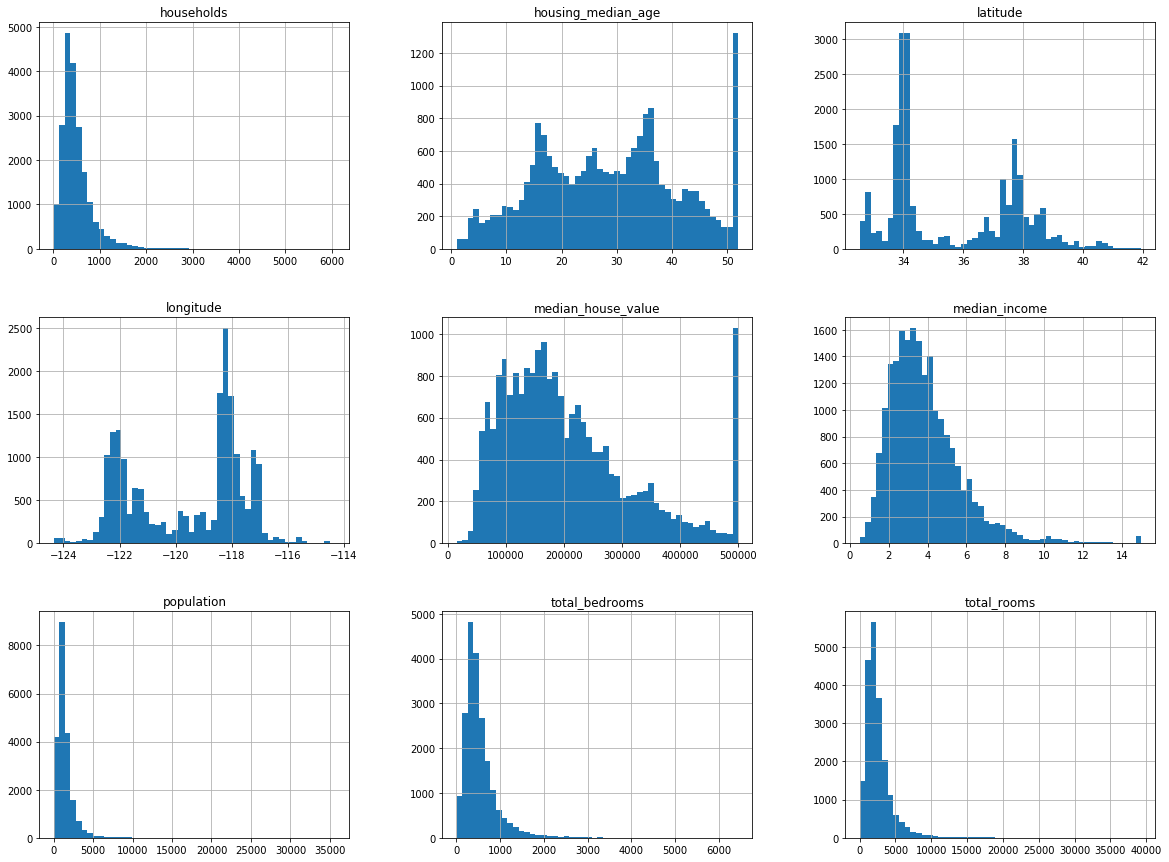

In [10]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
data["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

5. 对数据进行可视化

Text(0.5,1,'Geographical Data')

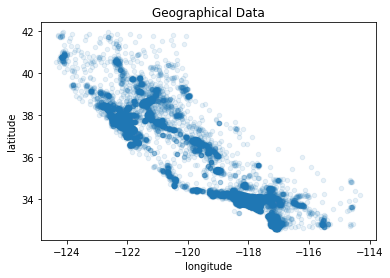

In [12]:
#地理数据可视化
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.title("Geographical Data")

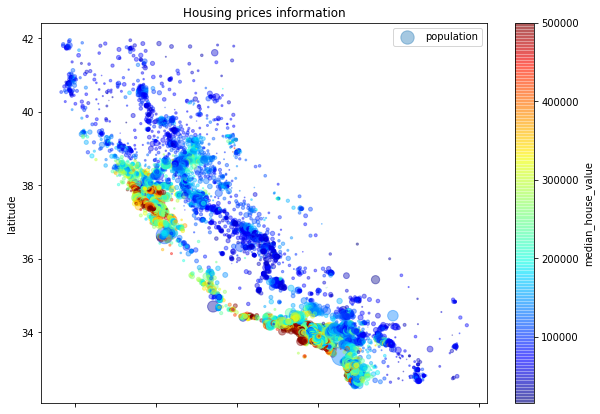

In [13]:
#查看房价信息
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=data["population"]/100, label="population",
          figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.title("Housing prices information")
plt.legend()

6. 查看字段间的相关性

In [14]:
corr_matrix = data.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000125BB0F0>,
      dtype=object)

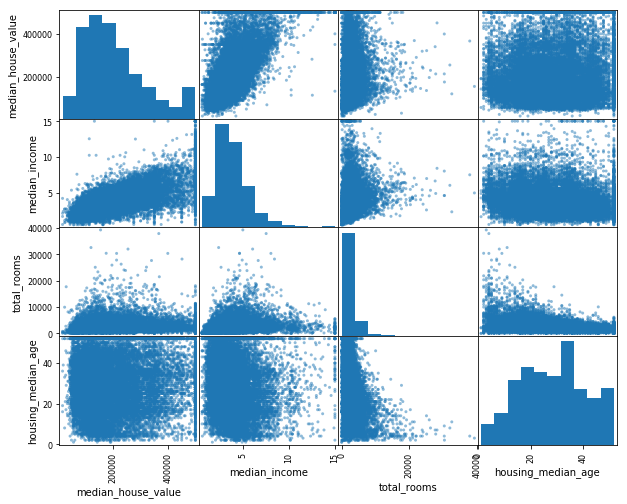

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(data[attributes], figsize=(10,8))

Text(0.5,1,'the relationship between income and houseValue')

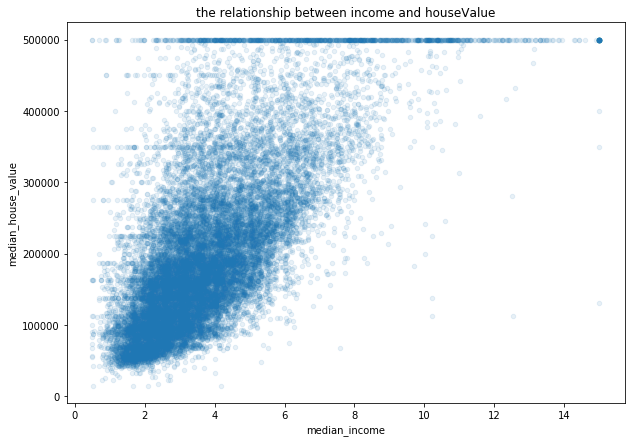

In [17]:
data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(10,7))
plt.title("the relationship between income and houseValue")

In [18]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/ data["households"]

In [19]:
corr_matrix = data.corr()

In [20]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

**<font size=4>Ⅱ 数据预处理</font>**

1.将label和特征分开

In [21]:
data_labels = data["median_house_value"]
data_features = data.drop("median_house_value", axis=1)

In [22]:
data_labels.shape, data_features.shape

((20640,), (20640, 12))

2.缺失值填充

In [23]:
median = data_features["total_bedrooms"].median()
data_features["total_bedrooms"].fillna(median, inplace=True)

In [24]:
data_features.count()

longitude                   20640
latitude                    20640
housing_median_age          20640
total_rooms                 20640
total_bedrooms              20640
population                  20640
households                  20640
median_income               20640
ocean_proximity             20640
rooms_per_household         20640
bedrooms_per_room           20433
population_per_household    20640
dtype: int64

In [25]:
median_bedrooms_per_room = data_features["bedrooms_per_room"].median()
data_features["bedrooms_per_room"].fillna(median_bedrooms_per_room, inplace=True)

In [26]:
data_features.count()

longitude                   20640
latitude                    20640
housing_median_age          20640
total_rooms                 20640
total_bedrooms              20640
population                  20640
households                  20640
median_income               20640
ocean_proximity             20640
rooms_per_household         20640
bedrooms_per_room           20640
population_per_household    20640
dtype: int64

<font color="red">可以发现此时已经对缺失值进行了填充，特征数据集中没有缺失值。</font>

3.对类别属性进行处理

①使用dummy进行哑元编码

In [27]:
data_features = pd.get_dummies(data_features)

In [28]:
data_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,0,0,0,1,0


②使用OrdinalEncoder对类别进行顺序编码

In [29]:
#from sklearn.preprocessing import OrdinalEncoder
#ordinalencoder = OrdinalEncoder()

In [30]:
#oceanproximity = data_features[["ocean_proximity"]]

In [31]:
#encoderarray = ordinalencoder.fit_transform(oceanproximity)
#encoderarray

In [32]:
#ordinalencoder.categories_

4.特征缩放

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_features)
features_scaled = scaler.transform(data_features)

In [34]:
features_scaled

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

4.特征选择

In [35]:
data_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,0,0,0,1,0


In [36]:
data_features.shape

(20640, 16)

In [37]:
features_array = data_features.values

In [38]:
target_array = data_labels.values

①利用filter进行特征选择

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [40]:
data_features.count()

longitude                     20640
latitude                      20640
housing_median_age            20640
total_rooms                   20640
total_bedrooms                20640
population                    20640
households                    20640
median_income                 20640
rooms_per_household           20640
bedrooms_per_room             20640
population_per_household      20640
ocean_proximity_<1H OCEAN     20640
ocean_proximity_INLAND        20640
ocean_proximity_ISLAND        20640
ocean_proximity_NEAR BAY      20640
ocean_proximity_NEAR OCEAN    20640
dtype: int64

In [42]:
#假设选择最重要的五个特征
kbest = SelectKBest(f_regression,k=7).fit(features_array, target_array)
features_kbest = kbest.transform(features_array)
featureInd = kbest.get_support()

In [43]:
data_features.columns[featureInd == True]

Index(['latitude', 'median_income', 'rooms_per_household', 'bedrooms_per_room',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY'],
      dtype='object')

②使用迭代特征选择rfe

<font color="red" size=2>比较耗时，暂时就不用了</font>

In [ ]:
#from sklearn.linear_model import LogisticRegression

In [ ]:
#from sklearn.feature_selection import RFE
#rfe = RFE(LogisticRegression(), n_features_to_select=5)
#rfe.fit(features_array, target_array)
#featureInd = rfe.get_support()

③利用主成因做特征选择

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(features_scaled)
features_pca = pca.transform(features_scaled)

In [45]:
features_scaled.shape

(20640, 16)

In [46]:
features_pca.shape

(20640, 6)

5.划分测试集和训练集

对收入中位数进行处理

In [47]:
data_features["income_cat"] = pd.cut(data_features["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

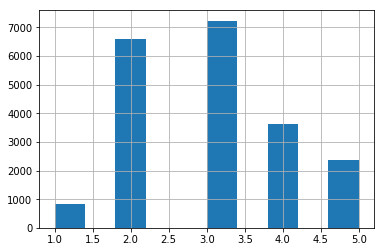

In [48]:
data_features["income_cat"].hist()

对数据进行分层抽样

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit
shuffle = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [50]:
for train_index, test_index in shuffle.split(data_features, data_features["income_cat"]):
    train_set = data_features.iloc[train_index].drop("income_cat", axis=1) 
    test_set = data_features.iloc[test_index].drop("income_cat", axis=1) 
    train_target = data_labels.iloc[train_index]
    test_target = data_labels.iloc[test_index]

In [51]:
train_set.shape,test_set.shape

((16512, 16), (4128, 16))

In [52]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,4.625369,0.223852,2.094395,1,0,0,0,0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,6.008850,0.159057,2.707965,1,0,0,0,0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,4.225108,0.241291,2.025974,0,0,0,0,1
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,5.232295,0.200866,4.135977,0,1,0,0,0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,4.505810,0.231341,3.047847,1,0,0,0,0


删除我们添加的字段income_cat

In [53]:
data_features.drop("income_cat", axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,4.761658,0.231774,2.139896,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,4.931907,0.192899,2.128405,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,4.797527,0.221327,1.788253,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,4.294118,0.260274,2.026891,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,4.970588,0.199211,2.172269,0,0,0,1,0


**<font size=4>Ⅲ 模型选择</font>**

1.利用linearRegression对数据进行拟合

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline

将Pandas的DataFrame格式转换为ndarray格式

In [69]:
train_features_array = train_set.values
train_target_array = train_target.values

In [70]:
test_features_array = test_set.values
test_target_array = test_target.values

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()),("linearregression", LinearRegression())])

In [ ]:
pipe.fit(train_features_array, train_target_array)

In [55]:
from sklearn.metrics import mean_squared_error

In [ ]:
pipe.score(train_features_array, train_target)

In [ ]:
pipe.score(test_features_array, test_target)

In [ ]:
y_pred = pipe.predict(test_features_array)

In [ ]:
np.sqrt(mean_squared_error(y_pred, test_target))

2.利用DecisionTreeRegressor对数据进行拟合

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
pipe = Pipeline([("scaler",StandardScaler()),("decisiontreeregressor",DecisionTreeRegressor())])

In [ ]:
pipe.fit(train_features_array, train_target_array)

In [ ]:
y_pred = pipe.predict(test_features_array)

In [ ]:
pipe.score(train_features_array, train_target)

In [ ]:
pipe.score(test_features_array, test_target)

In [ ]:
np.sqrt(mean_squared_error(y_pred, test_target))

对决策树模型进行交叉验证

In [ ]:
data_features.shape

In [ ]:
data_labels.shape

In [57]:
from sklearn.model_selection import cross_val_score

In [ ]:
treeRegressor = DecisionTreeRegressor()

In [ ]:
scores = cross_val_score(treeRegressor, data_features, data_labels, scoring="neg_mean_squared_error", cv=10)

In [ ]:
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
tree_rmse_scores

3.利用随机森林进行预测

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
forest = RandomForestRegressor()

In [60]:
scores = cross_val_score(forest, data_features, data_labels, scoring="neg_mean_squared_error", cv=10)

In [61]:
forest_rmse_scores = np.sqrt(-scores)

In [62]:
forest_rmse_scores

array([102563.49612799,  50263.46205872,  68360.07272831,  58995.91214645,
        64891.7209832 ,  61466.88607131,  48234.62046645,  85135.39824658,
        76794.51856934,  51317.42655946])

In [65]:
scores = cross_val_score(forest, data_features, data_labels, cv=10)

In [66]:
scores

array([-0.11625317,  0.77685962,  0.69442454,  0.5137069 ,  0.75540531,
        0.67145621,  0.5403523 ,  0.49379865,  0.51431562,  0.66672232])

In [67]:
pipe = Pipeline([("scaler",StandardScaler()),("randomforestRegressor", RandomForestRegressor())])

In [71]:
pipe.fit(train_features_array, train_target_array)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestRegressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [72]:
y_pred = pipe.predict(test_features_array)

In [73]:
pipe.score(train_features_array, train_target)

0.9641380284415851

In [74]:
pipe.score(test_features_array, test_target)

0.7967493636741493

In [75]:
np.sqrt(mean_squared_error(y_pred, test_target))

51465.42150044917

**<font size=4>Ⅳ 超参优化</font>**

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = {"randomforestRegressor__n_estimators":[3,10,30], 
              "randomforestRegressor__max_features":[2,4,6,8]}

In [78]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

In [79]:
grid.fit(train_features_array, train_target_array)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestRegressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
  

查看最佳参数

In [80]:
grid.best_params_

{'randomforestRegressor__max_features': 6,
 'randomforestRegressor__n_estimators': 30}

In [81]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestRegressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features=6,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=30, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [82]:
cvres = grid.cv_results_

Text(0.5,1.05,'GridSearchCV result')

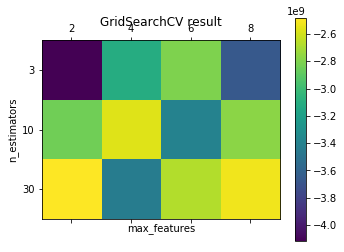

In [83]:
plt.matshow(cvres["mean_test_score"].reshape(3,-1),cmap="viridis")
plt.xlabel("max_features")
plt.ylabel("n_estimators")
plt.xticks(range(len(param_grid["randomforestRegressor__max_features"])), 
           param_grid["randomforestRegressor__max_features"])
plt.yticks(range(len(param_grid["randomforestRegressor__n_estimators"])), 
           param_grid["randomforestRegressor__n_estimators"])
plt.colorbar()
plt.title("GridSearchCV result")

In [84]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64180.36221581375 {'randomforestRegressor__max_features': 2, 'randomforestRegressor__n_estimators': 3}
55705.46720853997 {'randomforestRegressor__max_features': 2, 'randomforestRegressor__n_estimators': 10}
52910.40486646904 {'randomforestRegressor__max_features': 2, 'randomforestRegressor__n_estimators': 30}
60531.42716027736 {'randomforestRegressor__max_features': 4, 'randomforestRegressor__n_estimators': 3}
53249.332035972635 {'randomforestRegressor__max_features': 4, 'randomforestRegressor__n_estimators': 10}
50636.44528692125 {'randomforestRegressor__max_features': 4, 'randomforestRegressor__n_estimators': 30}
58246.86921197353 {'randomforestRegressor__max_features': 6, 'randomforestRegressor__n_estimators': 3}
52621.27264748095 {'randomforestRegressor__max_features': 6, 'randomforestRegressor__n_estimators': 10}
49831.6360311227 {'randomforestRegressor__max_features': 6, 'randomforestRegressor__n_estimators': 30}
58589.715998409876 {'randomforestRegressor__max_features': 8, 'rand

In [85]:
pipe = Pipeline([("scaler",StandardScaler()),("randomforestRegressor", RandomForestRegressor(n_estimators=30, max_features=8))])

In [86]:
pipe.fit(train_features_array, train_target_array)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestRegressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features=8,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=30, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [87]:
y_pred = pipe.predict(test_features_array)

In [88]:
pipe.score(test_features_array, test_target)

0.8236207791995587

In [89]:
np.sqrt(mean_squared_error(y_pred, test_target))

47942.78811566565

**<font size=4>Ⅴ模型评估</font>**

1. 查看特征对预测的重要性

In [90]:
grid.best_estimator_.named_steps["randomforestRegressor"].feature_importances_

array([7.50592357e-02, 6.49567112e-02, 4.46159061e-02, 1.82743349e-02,
       1.56642796e-02, 1.69777402e-02, 1.60333087e-02, 3.52407502e-01,
       5.37470076e-02, 6.93034947e-02, 1.05679011e-01, 1.19382745e-02,
       1.47073057e-01, 6.18857316e-05, 2.77864350e-03, 5.42960813e-03])

In [91]:
final_model = grid.best_estimator_

In [112]:
pred = final_model.predict(test_features_array)

In [113]:
final_mse = mean_squared_error(pred, test_target_array)

In [114]:
final_rmse = np.sqrt(final_mse)

In [115]:
final_rmse

48096.062673000335

In [116]:
final_model.score(test_features_array, test_target_array)

0.8224911969190245

In [117]:
from scipy import stats

In [118]:
confidence = 0.95

In [119]:
squared_errors = (pred - test_target_array) ** 2

In [120]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),scale=stats.sem(squared_errors)))

array([46071.67898536, 50038.61393724])